In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
tracks_df= pd.read_csv('E:/Data Analysis/Eda with python/spotify/dataset.csv/dataset.csv')

In [4]:
tracks_df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [12]:
tracks_df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [24]:
tracks_df.drop_duplicates(keep=False,inplace=True)

In [25]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112871 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           112870 non-null  object 
 1   album_name        112870 non-null  object 
 2   track_name        112870 non-null  object 
 3   popularity        112871 non-null  int64  
 4   duration_ms       112871 non-null  int64  
 5   explicit          112871 non-null  bool   
 6   danceability      112871 non-null  float64
 7   energy            112871 non-null  float64
 8   key               112871 non-null  int64  
 9   loudness          112871 non-null  float64
 10  mode              112871 non-null  int64  
 11  speechiness       112871 non-null  float64
 12  acousticness      112871 non-null  float64
 13  instrumentalness  112871 non-null  float64
 14  liveness          112871 non-null  float64
 15  valence           112871 non-null  float64
 16  tempo             11

In [15]:
tracks_df.describe()

popularity   duration_ms   danceability         energy  \
count  114000.000000  1.140000e+05  114000.000000  114000.000000   
mean       33.238535  2.280292e+05       0.566800       0.641383   
std        22.305078  1.072977e+05       0.173542       0.251529   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        5.309140      -8.258960       0.637553       0.084652   
std         3.559987       5.029337       0.480709       0.105732   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       0.000000       0.035900   
50%         5.000000      -7.004000       1.000000       0.048900   
75%         8.000000      -5.003000       1.000000       0.084500   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  114000.000000     114000.000000  114000.000000  114000.000000   
mean        0.314910          0.156050       0.213553       0.474068   
std         0.332523          0.309555       0.190378       0.259261   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016900          0.000000       0.098000       0.260000   
50%         0.169000          0.000042       0.132000       0.464000   
75%         0.598000          0.049000       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature  
count  114000.000000   114000.000000  
mean      122.147837        3.904035  
std        29.978197        0.432621  
min         0.000000        0.000000  
25%        99.218750        4.000000  
50%       122.017000        4.000000  
75%       140.071000        4.000000  
max       243.372000        5.000000

In [30]:
#top 10 trending songs
tending_songs=tracks_df.query('popularity>90',inplace=False).sort_values('popularity',ascending=False).head(10)
tending_songs

artists                             album_name  \
20001     Sam Smith;Kim Petras              Unholy (feat. Kim Petras)   
81051     Sam Smith;Kim Petras              Unholy (feat. Kim Petras)   
51664         Bizarrap;Quevedo  Quevedo: Bzrp Music Sessions, Vol. 52   
81210  David Guetta;Bebe Rexha                        I'm Good (Blue)   
89411            Manuel Turizo                             La Bachata   
20008  David Guetta;Bebe Rexha                        I'm Good (Blue)   
88410            Manuel Turizo                             La Bachata   
30003  David Guetta;Bebe Rexha                        I'm Good (Blue)   
67356            Manuel Turizo                             La Bachata   
68303            Manuel Turizo                             La Bachata   

                                  track_name  popularity  duration_ms  \
20001              Unholy (feat. Kim Petras)         100       156943   
81051              Unholy (feat. Kim Petras)         100       156943   
51664  Quevedo: Bzrp Music Sessions, Vol. 52          99       198937   
81210                        I'm Good (Blue)          98       175238   
89411                             La Bachata          98       162637   
20008                        I'm Good (Blue)          98       175238   
88410                             La Bachata          98       162637   
30003                        I'm Good (Blue)          98       175238   
67356                             La Bachata          98       162637   
68303                             La Bachata          98       162637   

       explicit  danceability  energy  key  loudness  mode  speechiness  \
20001     False         0.714   0.472    2    -7.375     1       0.0864   
81051     False         0.714   0.472    2    -7.375     1       0.0864   
51664     False         0.621   0.782    2    -5.548     1       0.0440   
81210      True         0.561   0.965    7    -3.673     0       0.0343   
89411     False         0.835   0.679    7    -5.329     0       0.0364   
20008      True         0.561   0.965    7    -3.673     0       0.0343   
88410     False         0.835   0.679    7    -5.329     0       0.0364   
30003      True         0.561   0.965    7    -3.673     0       0.0343   
67356     False         0.835   0.679    7    -5.329     0       0.0364   
68303     False         0.835   0.679    7    -5.329     0       0.0364   

       acousticness  instrumentalness  liveness  valence    tempo  \
20001       0.01300          0.000005     0.266    0.238  131.121   
81051       0.01300          0.000005     0.266    0.238  131.121   
51664       0.01250          0.033000     0.230    0.550  128.033   
81210       0.00383          0.000007     0.371    0.304  128.040   
89411       0.58300          0.000002     0.218    0.850  124.980   
20008       0.00383          0.000007     0.371    0.304  128.040   
88410       0.58300          0.000002     0.218    0.850  124.980   
30003       0.00383          0.000007     0.371    0.304  128.040   
67356       0.58300          0.000002     0.218    0.850  124.980   
68303       0.58300          0.000002     0.218    0.850  124.980   

       time_signature track_genre  
20001               4       dance  
81051               4         pop  
51664               4     hip-hop  
81210               4         pop  
89411               4   reggaeton  
20008               4       dance  
88410               4      reggae  
30003               4         edm  
67356               4       latin  
68303               4      latino

In [39]:
#duration ms to s

# tracks_df['Duration']=tracks_df['duration_ms'].apply(lambda x: round(x/10000))
# tracks_df.drop(['duration_ms'],inplace=True,axis=1)
tracks_df['Duration'].apply(lambda x: round(x/100))
tracks_df.head(10)

artists  \
0                           Gen Hoshino   
1                          Ben Woodward   
2                Ingrid Michaelson;ZAYN   
3                          Kina Grannis   
4                      Chord Overstreet   
5                          Tyrone Wells   
6  A Great Big World;Christina Aguilera   
7                            Jason Mraz   
8             Jason Mraz;Colbie Caillat   
9                        Ross Copperman   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   
5                               Days I Will Remember   
6                        Is There Anybody Out There?   
7                We Sing. We Dance. We Steal Things.   
8                We Sing. We Dance. We Steal Things.   
9                                             Hunger   

                   track_name  popularity  explicit  danceability  energy  \
0                      Comedy          73     False         0.676  0.4610   
1            Ghost - Acoustic          55     False         0.420  0.1660   
2              To Begin Again          57     False         0.438  0.3590   
3  Can't Help Falling In Love          71     False         0.266  0.0596   
4                     Hold On          82     False         0.618  0.4430   
5        Days I Will Remember          58     False         0.688  0.4810   
6               Say Something          74     False         0.407  0.1470   
7                   I'm Yours          80     False         0.703  0.4440   
8                       Lucky          74     False         0.625  0.4140   
9                      Hunger          56     False         0.442  0.6320   

   key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    1    -6.746     0       0.1430        0.0322          0.000001    0.3580   
1    1   -17.235     1       0.0763        0.9240          0.000006    0.1010   
2    0    -9.734     1       0.0557        0.2100          0.000000    0.1170   
3    0   -18.515     1       0.0363        0.9050          0.000071    0.1320   
4    2    -9.681     1       0.0526        0.4690          0.000000    0.0829   
5    6    -8.807     1       0.1050        0.2890          0.000000    0.1890   
6    2    -8.822     1       0.0355        0.8570          0.000003    0.0913   
7   11    -9.331     1       0.0417        0.5590          0.000000    0.0973   
8    0    -8.700     1       0.0369        0.2940          0.000000    0.1510   
9    1    -6.770     1       0.0295        0.4260          0.004190    0.0735   

   valence    tempo  time_signature track_genre  Duration  
0   0.7150   87.917               4    acoustic        23  
1   0.2670   77.489               4    acoustic        15  
2   0.1200   76.332               4    acoustic        21  
3   0.1430  181.740               3    acoustic        20  
4   0.1670  119.949               4    acoustic        20  
5   0.6660   98.017               4    acoustic        21  
6   0.0765  141.284               3    acoustic        23  
7   0.7120  150.960               4    acoustic        24  
8   0.6690  130.088               4    acoustic        19  
9   0.1960   78.899               4    acoustic        21

C:\Users\Asus\AppData\Local\Temp\ipykernel_36688\2841559864.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=tracks_df.drop(['explicit'],axis=1).corr(method='pearson')


Text(0.5, 1.0, 'correlation Heatmap')

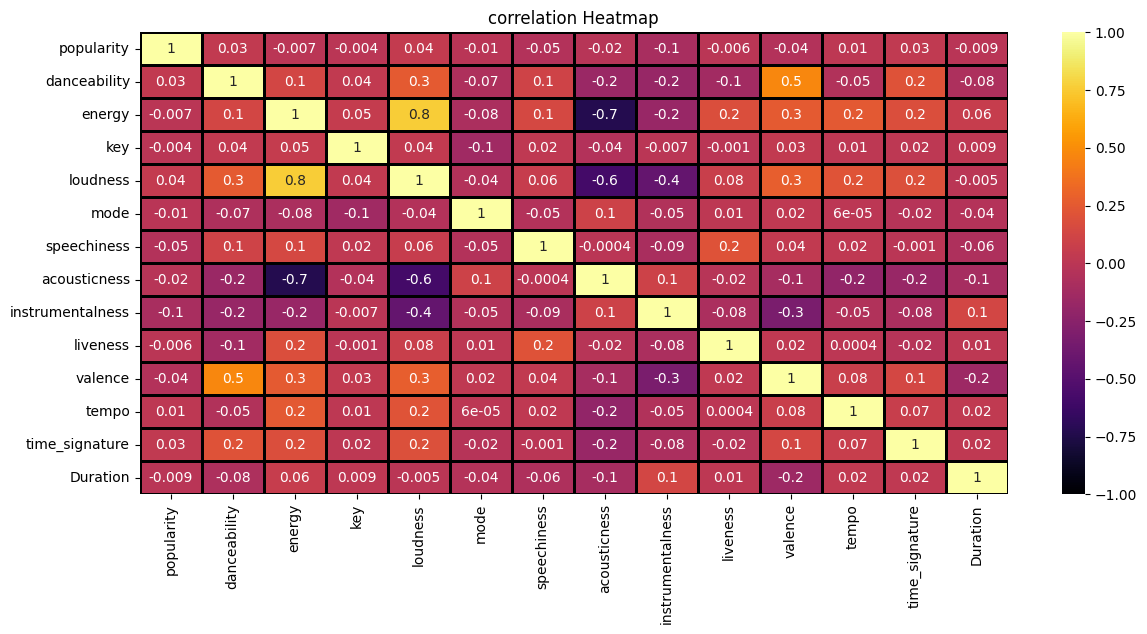

In [45]:
#corrrealation heatmap

corr_df=tracks_df.drop(['explicit'],axis=1).corr(method='pearson')
plt.figure(figsize=(14,6))
heatmap= sns.heatmap(corr_df,annot=True,fmt='.1g',vmin=-1,vmax=1,center=0,cmap='inferno',linewidth=1,linecolor='Black')
heatmap.set_title('correlation Heatmap')
# heatmap.set_xlabels(heatmap.get_xlables(),rotation=90)

In [71]:
sample= tracks_df.sample(int(0.004*len(tracks_df)))

In [72]:
print(len(sample))

451


[Text(0.5, 1.0, 'loudness Vs Energy')]

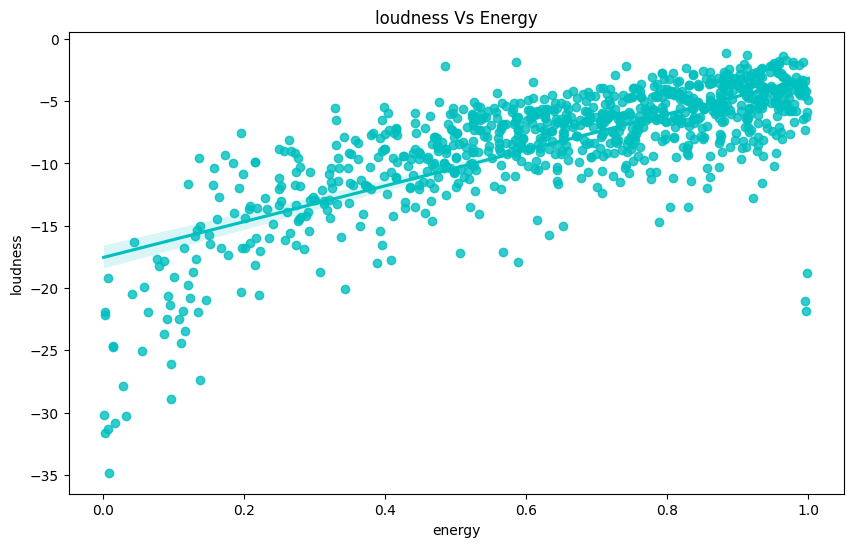

In [52]:
#regression plot for engery and loudness

plt.figure(figsize=(10,6))
sns.regplot(data=sample,x="energy",y="loudness",color='c').set(title="loudness Vs Energy")


[Text(0.5, 1.0, 'popularity Vs acousticness')]

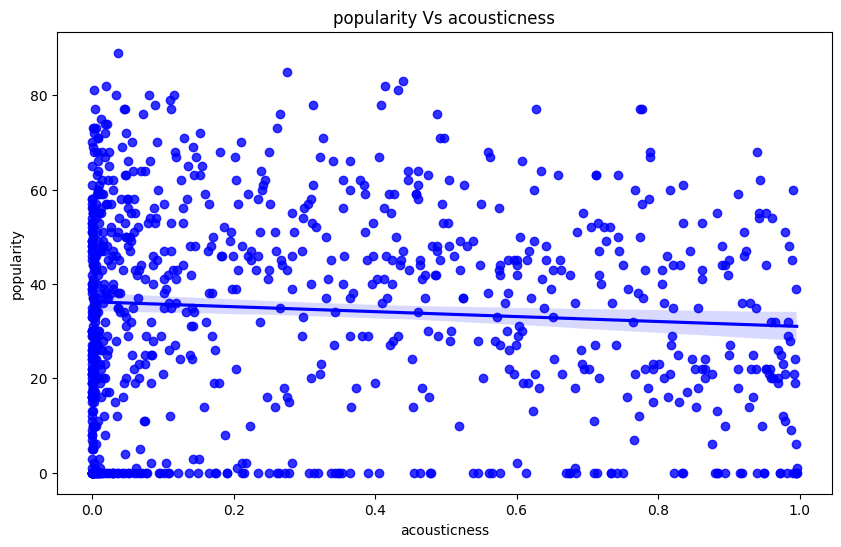

In [53]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample,x="acousticness",y="popularity",color='b').set(title="popularity Vs acousticness")

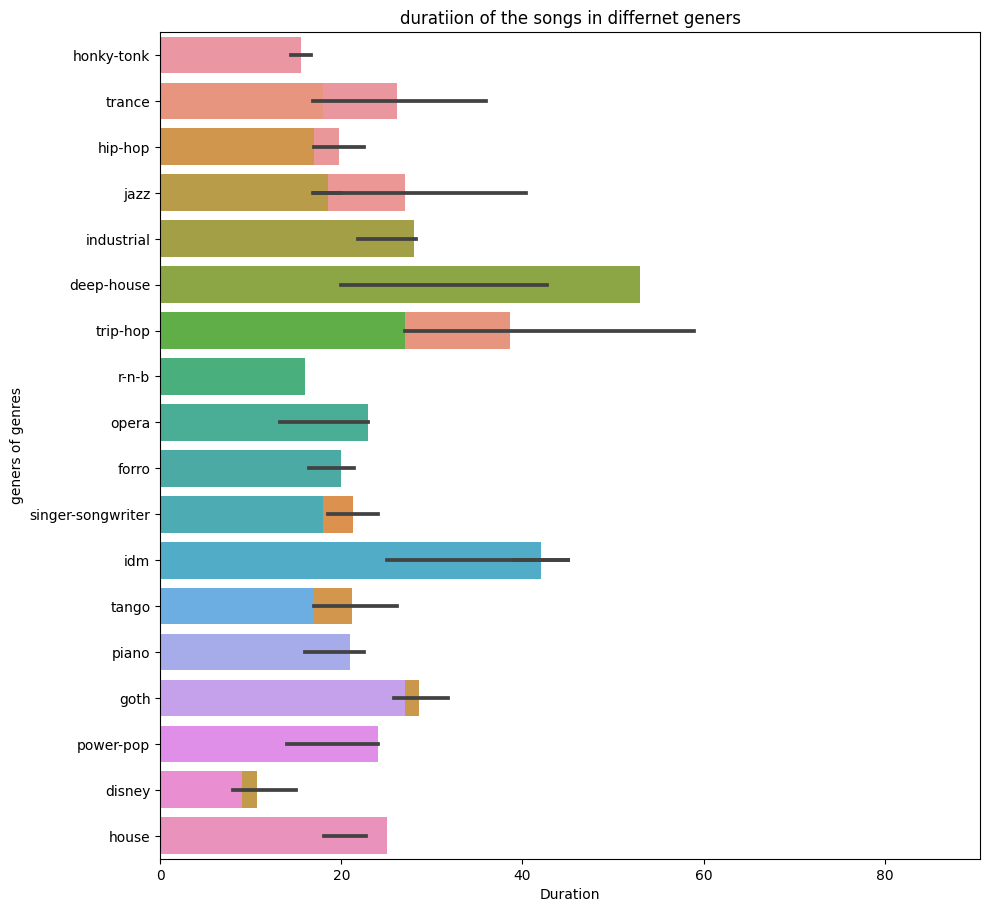

In [84]:
plt.figure(figsize=(10,9))
sample1=sample.head(20)
sns.color_palette("rocket",as_cmap=True)
sns.barplot(y="track_genre",x="Duration",data=sample)
ax= sns.barplot(y="track_genre",x="Duration",data=sample1)

plt.tight_layout()

plt.title("duratiion of the songs in differnet geners")
plt.ylabel("geners of genres")
plt.show()